In [128]:
require(sp)
require(tidyr)

Loading required package: tidyr



In [2]:
options(repr.plot.width=20, repr.plot.height=15)

In [157]:
env=read.csv("~/Documents/Perk_distribution/EnvironmentalData_MD&VAupdated.csv", row.names=NULL)
perk=read.csv("~/Documents/Perk_distribution/Perkinsus_MDVA.csv", header=FALSE, row.names=NULL)

In [158]:
#pull out env sites
env_sites=env[,c(1,8,9)]

In [160]:
env_sites=unique(env_sites)

In [165]:
#pull out longlat
env_longlat=as.matrix(sapply(env_sites[,c(2,3)], as.numeric))

In [167]:
#env_longlat=na.omit(env_longlat)

In [189]:
#pull out perksites
perk_sites=perk[,5:7]

In [190]:
colnames(perk_sites)=c("Site", "Latitude", "Longitude")

In [191]:
perk_sites$Site=gsub(" ", "", perk_sites$Site) 
#perk_sites$Latitude=gsub("", NA, perk_sites$Latitude) 
#perk_sites$Longitude=gsub("", NA, perk_sites$Longitude) 

In [192]:
perk_sites=unique(perk_sites)

In [187]:
#perk_sites=perk_sites[-which(perk_sites$Latitude == ""), ]

In [196]:
#take out NAs
perk_sites=drop_na(perk_sites, Latitude)

In [200]:
#pull out longlat
perk_longlat=as.matrix(sapply(perk_sites[,c(2,3)], as.numeric))


In [202]:
#make distance matrix (euclidean)
distsall=spDists(perk_longlat, env_longlat)

In [206]:
colnames(distsall)=env_sites$MonitoringLocation

In [207]:
rownames(distsall)=perk_sites$Site

In [208]:
(distsall)

,LE5.5-W,LE5.2,WE4.4,CB7.3,WE4.3,RET5.2,LE5.1,LE4.2,WE4.1,TF5.3,⋯,CB4.2W,EE2.2,ET5.2,EE2.1,CB4.2C,EE1.1,CB3.3W,ET4.2,CB3.2,ET6.2
ABERDEENROCK,0.4422557,0.27938342,0.3811455,0.5231430,0.2772953,0.2247393,0.14067572,0.05014427,0.25529141,0.7950676,⋯,0.9992665,1.0840939,1.1665484,1.1688404,1.14655244,1.2787945,1.29390182,1.3466891,1.79820773,1.8391716
BACKCOVE,1.0837163,1.15111612,0.9718615,0.9248568,0.9395802,1.1524352,1.06356218,0.95139400,0.80645886,1.5458033,⋯,0.5021838,0.3335280,0.3883703,0.4155937,0.52724956,0.5179536,0.61444448,0.5853742,1.07291968,1.2790889
BARNSPOINT,0.4422557,0.27938342,0.3811455,0.5231430,0.2772953,0.2247393,0.14067572,0.05014427,0.25529141,0.7950676,⋯,0.9992665,1.0840939,1.1665484,1.1688404,1.14655244,1.2787945,1.29390182,1.3466891,1.79820773,1.8391716
BELLROCK,0.6525605,0.45592587,0.5903212,0.7245413,0.4861934,0.2830956,0.29891650,0.25880323,0.43865697,0.6480931,⋯,0.9017733,1.0306691,1.1113849,1.1072828,1.05666854,1.2104326,1.20486500,1.2741184,1.69773291,1.7011197
BOWLERSROCK,0.9301161,0.78455988,0.8431752,0.9372100,0.7451411,0.6261086,0.63056811,0.55975452,0.64644687,0.7815666,⋯,0.5938570,0.7686109,0.8431407,0.8314152,0.75106230,0.9230438,0.89627020,0.9804367,1.37366162,1.3589382
BROADCREEK,0.5780540,0.59731526,0.4668657,0.4925163,0.4065957,0.6095802,0.51050485,0.39871107,0.26901693,1.1056406,⋯,0.7421273,0.7584690,0.8393769,0.8491193,0.86669194,0.9631446,1.00549653,1.0339815,1.51174124,1.6166083
BROOMEISLAND,1.4277863,1.34950992,1.3224578,1.3600863,1.2426521,1.2223417,1.20531874,1.11482176,1.11422880,1.3021331,⋯,0.1902057,0.4240499,0.4483711,0.4164174,0.25706441,0.4454947,0.35616231,0.4733313,0.77782046,0.7687445
BRUFFSISLAND,1.8650637,1.84786165,1.7529242,1.7448342,1.6929502,1.7585834,1.71842830,1.61612427,1.55593717,1.8868046,⋯,0.5827728,0.5430106,0.4722968,0.4513753,0.43168348,0.3407530,0.28490023,0.2719695,0.22404537,0.4762732
BUGBY,1.8786240,1.85715079,1.7666978,1.7611073,1.7053931,1.7642881,1.72629453,1.62480501,1.56861459,1.8820643,⋯,0.5886704,0.5608860,0.4921813,0.4698405,0.44035600,0.3610552,0.29577326,0.2937285,0.21220053,0.4467089
BUOYROCK,1.9974876,1.97481615,1.8855520,1.8793067,1.8241933,1.8791526,1.84304766,1.74213551,1.68744544,1.9802010,⋯,0.7045664,0.6780128,0.6074305,0.5864822,0.55826744,0.4758582,0.41452986,0.4066961,0.09553863,0.3836734


In [265]:
#make dataframe of minimum distances and sites
mindists=as.data.frame(rownames(distsall))
mindists$min=apply(distsall, 1, min)
mindists$envsites=apply(distsall, 1, function(x) colnames(distsall)[which.min(x)])
colnames(mindists)=c("perksite", "distance", "envsites")

In [267]:
write.csv(mindists, file="~/Documents/Perk_distribution/Closest_PerkEnv.csv")

In [261]:
require(ggplot2)

Loading required package: ggplot2



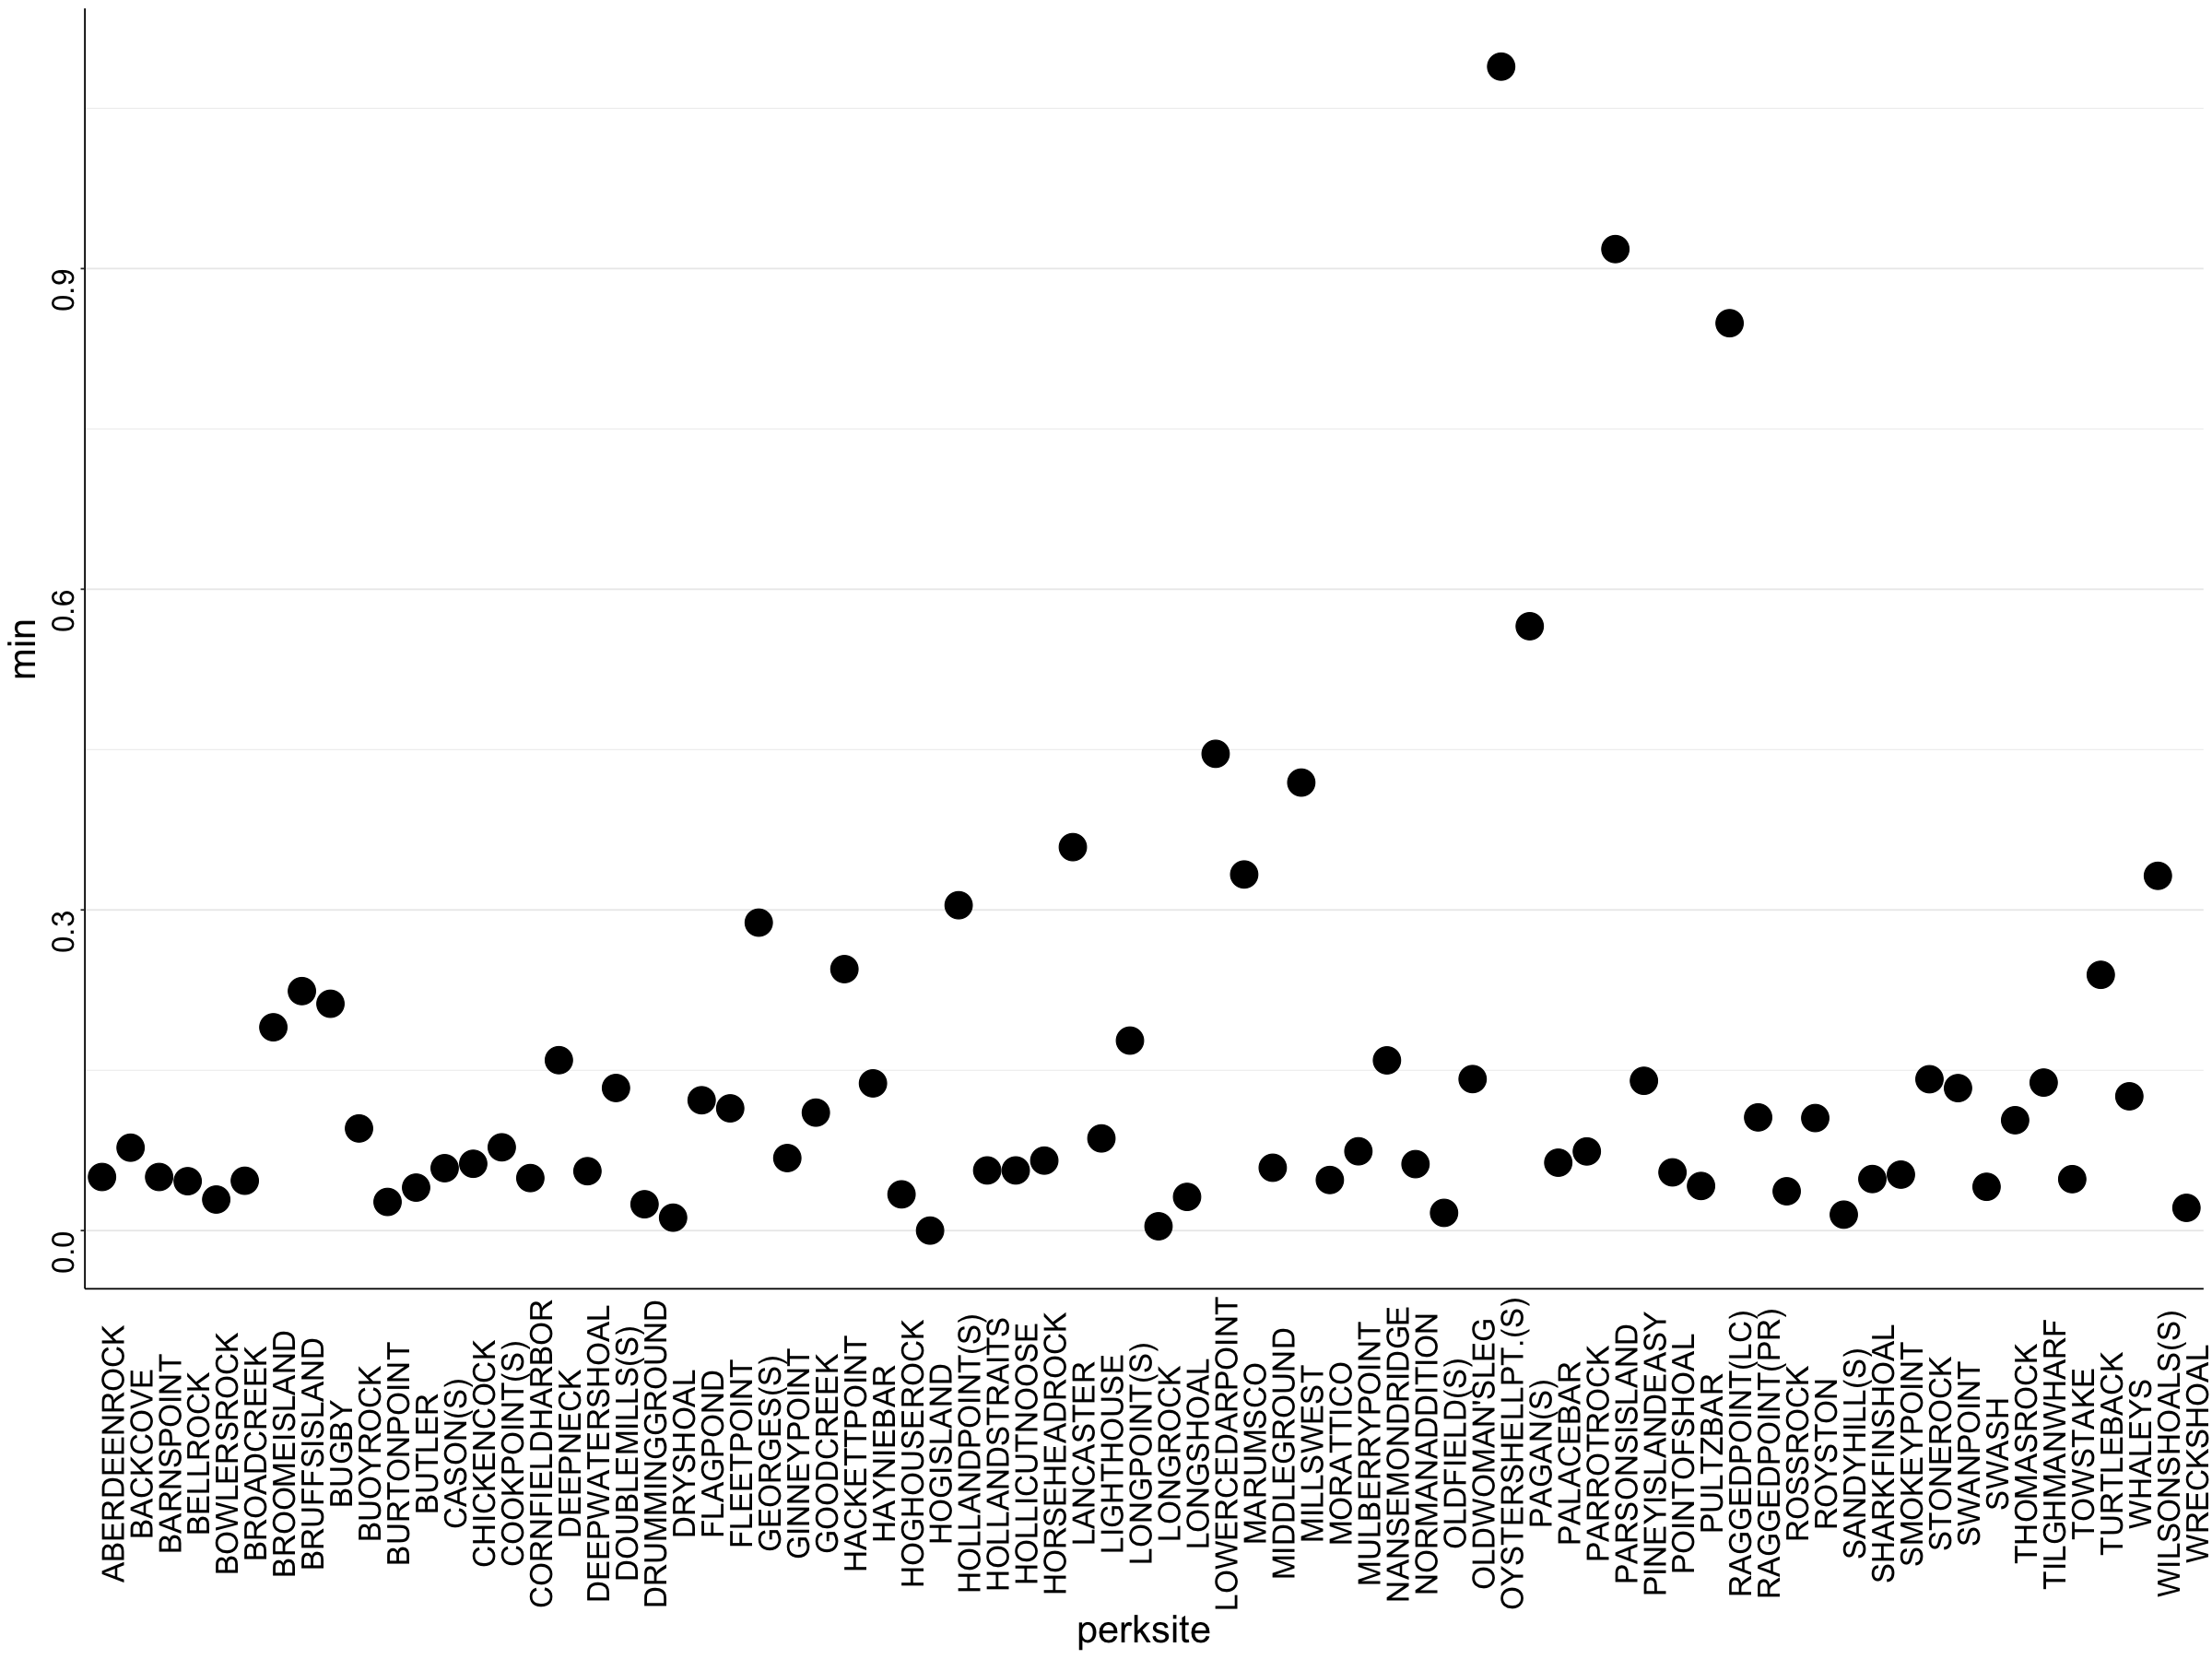

In [263]:
ggplot(mindists, aes(x=perksite, y=min))+
geom_point(size=8)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black",, angle=90),
          text = element_text(size=25))